## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


filename = 'cifar-target-loss.csv'
root_dir = "/Users/mat/Desktop/Files/Code/Research/datafames"
filepath = os.path.join(root_dir, filename)
data = pd.read_csv(filepath, index_col=0)
print(len(data))

141


In [2]:
# filter runs that only log dataset to wandb. They can be recognized because 
# most of their metrics are NaN
data = data.dropna(axis=0, thresh=50)
print(len(data))

140


In [3]:
data.head()

,train_size,optimizer,hidden_layers,train/loss,val/loss,denoising/train/avg_diff,flatness/train/avg_diff,ID,State,Notes,...,flatness/val/std_0.133,flatness/val/std_0.150,train/bias_norm,train/denoising_avg_diff,train/epoch,train/flatness_avg_diff,train/weight_norm,val/denoising_avg_diff,val/epoch,val/flatness_avg_diff
Name,,,,,,,,,,,,,,,,,,,,,
glamorous-flower-141,16384.0,SAM,"[3072,30]",0.053933,0.057682,0.005393,0.001930,eb9xlift,finished,-,...,0.000147,0.000234,0.000622,0.005393,14.0,0.001930,0.000009,0.005127,14.0,0.001855
dauntless-galaxy-140,16384.0,AdamW,"[3072,30]",0.050579,0.056946,0.006446,0.002189,n0ddr0hz,finished,-,...,0.000129,0.000213,0.000440,0.006446,13.0,0.002189,0.000009,0.006136,13.0,0.002115
likely-armadillo-139,8192.0,SAM,"[3072,30]",0.046212,0.058719,0.005408,0.002171,tuotzs7l,finished,-,...,0.000135,0.000174,0.000646,0.005408,29.0,0.002171,0.000009,0.004762,29.0,0.001989
cerulean-blaze-138,8192.0,AdamW,"[3072,30]",0.048685,0.058439,0.006935,0.002268,mvkoiyag,finished,-,...,0.000192,0.000189,0.000433,0.006935,26.0,0.002268,0.000009,0.006171,26.0,0.002088
feasible-capybara-137,4096.0,SAM,"[3072,30]",0.037379,0.067214,0.005459,0.003552,vyk82oxw,finished,-,...,0.000218,0.000263,0.000727,0.005459,74.0,0.003552,0.000009,0.003993,74.0,0.002735


In [4]:
data['hidden_layers'] = data['hidden_layers'].apply(lambda x: len(x.split(',')) - 1)
data['optimizer'] = data['optimizer'].apply(lambda x: x.lower())

In [5]:
filepath = "/Users/mat/Desktop/Files/Code/Research/datafames/metrics.txt"
with open(filepath) as f:
    metrics = f.read().splitlines()
metrics = [m.strip() for m in metrics]
keepers = metrics + ['train_size', 'hidden_layers', 'optimizer']

In [6]:
data = data[keepers]
data.head()

,flatness/train/mean_0.133,flatness/val/std_0.000,denoising/train/std_0.667,train/loss,flatness/train/std_0.083,denoising/val/mean_0.556,denoising/val/std_0.000,denoising/val/mean_0.333,denoising/val/std_0.667,flatness/val/mean_0.017,...,flatness/val/std_0.067,denoising/train/mean_0.333,flatness/train/avg_diff,flatness/train/std_0.100,flatness/val/std_0.150,denoising/val/std_0.778,denoising/train/mean_0.111,train_size,hidden_layers,optimizer
Name,,,,,,,,,,,,,,,,,,,,,
glamorous-flower-141,0.057425,0.0,0.000006,0.053933,0.000060,0.061755,0.0,0.059002,0.000022,0.057747,...,0.000080,0.054505,0.001930,0.000124,0.000234,0.000041,0.053241,16384.0,1,sam
dauntless-galaxy-140,0.057982,0.0,0.000041,0.050579,0.000124,0.062011,0.0,0.058667,0.000009,0.057010,...,0.000117,0.054928,0.002189,0.000092,0.000213,0.000031,0.053258,16384.0,1,adamw
likely-armadillo-139,0.052615,0.0,0.000008,0.046212,0.000078,0.062451,0.0,0.059910,0.000011,0.058782,...,0.000051,0.049094,0.002171,0.000074,0.000174,0.000015,0.047837,8192.0,1,sam
cerulean-blaze-138,0.053585,0.0,0.000067,0.048685,0.000108,0.063543,0.0,0.060173,0.000016,0.058504,...,0.000075,0.050607,0.002268,0.000138,0.000189,0.000037,0.048789,8192.0,1,adamw
feasible-capybara-137,0.041511,0.0,0.000009,0.037379,0.000074,0.070427,0.0,0.068282,0.000025,0.067308,...,0.000065,0.034971,0.003552,0.000129,0.000263,0.000010,0.033700,4096.0,1,sam


In [7]:
grouped = data.groupby(['train_size', 'hidden_layers', 'optimizer'])

## Plot Loss vs P

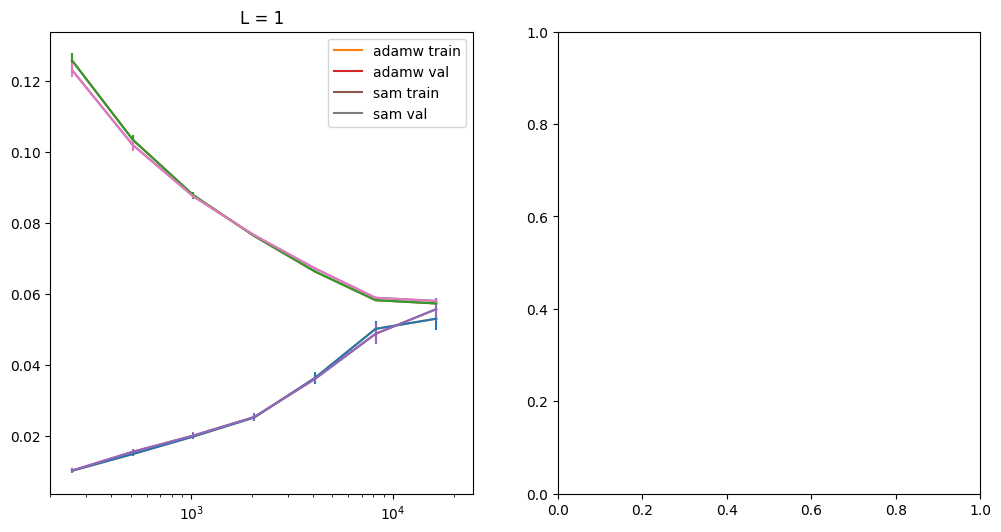

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
x_axis = [256, 512, 1024, 2048, 4096, 8192, 16384]
for i, hidden_layers in enumerate([1, 2]):
    for optimizer in ['adamw', 'sam']:
        try:
            train_losses = []
            train_stds = []
            val_losses = []
            val_stds = []
            for train_size in x_axis:
                d = grouped.get_group((train_size, hidden_layers, optimizer))
                train_losses.append(d['train/loss'].mean())
                train_stds.append(d['train/loss'].std())
                val_losses.append(d['val/loss'].mean())
                val_stds.append(d['val/loss'].std())
            ax[i].errorbar(x_axis, train_losses, yerr=train_stds)
            ax[i].plot(x_axis, train_losses, label=f'{optimizer} train')
            ax[i].errorbar(x_axis, val_losses, yerr=val_stds)
            ax[i].plot(x_axis, val_losses, label=f'{optimizer} val')
            ax[i].set_title(f"L = {hidden_layers}")
            ax[i].set_xscale('log')
            ax[i].set_xlim([200, 25000])
            ax[i].legend()
        except KeyError:
            pass
plt.show()

## Train Set flatness and denoising

In [15]:
flat_mean_cols_train = sorted([col for col in data.columns if 'flatness/train/mean' in col])
flat_std_cols_train = sorted([col for col in data.columns if 'flatness/train/std' in col])
flatness_sigmas = [col.split('_')[-1] for col in flat_mean_cols_train]
flatness_sigmas = [float(sigma) for sigma in flatness_sigmas]
flatness_sigmas = list(set(flatness_sigmas))
flatness_sigmas.sort()
flatness_sigmas

[0.0, 0.017, 0.033, 0.05, 0.067, 0.083, 0.1, 0.117, 0.133, 0.15]

In [16]:
den_mean_cols_train = sorted([col for col in data.columns if 'denoising/train/mean' in col])
den_std_cols_train = sorted([col for col in data.columns if 'denoising/train/std' in col])
denoising_sigmas = [col.split('_')[-1] for col in den_mean_cols_train]
denoising_sigmas = [float(sigma) for sigma in denoising_sigmas]
denoising_sigmas = list(set(denoising_sigmas))
denoising_sigmas.sort()
denoising_sigmas

[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]

### Plot Flatness on train set

In [11]:
train_size = 512

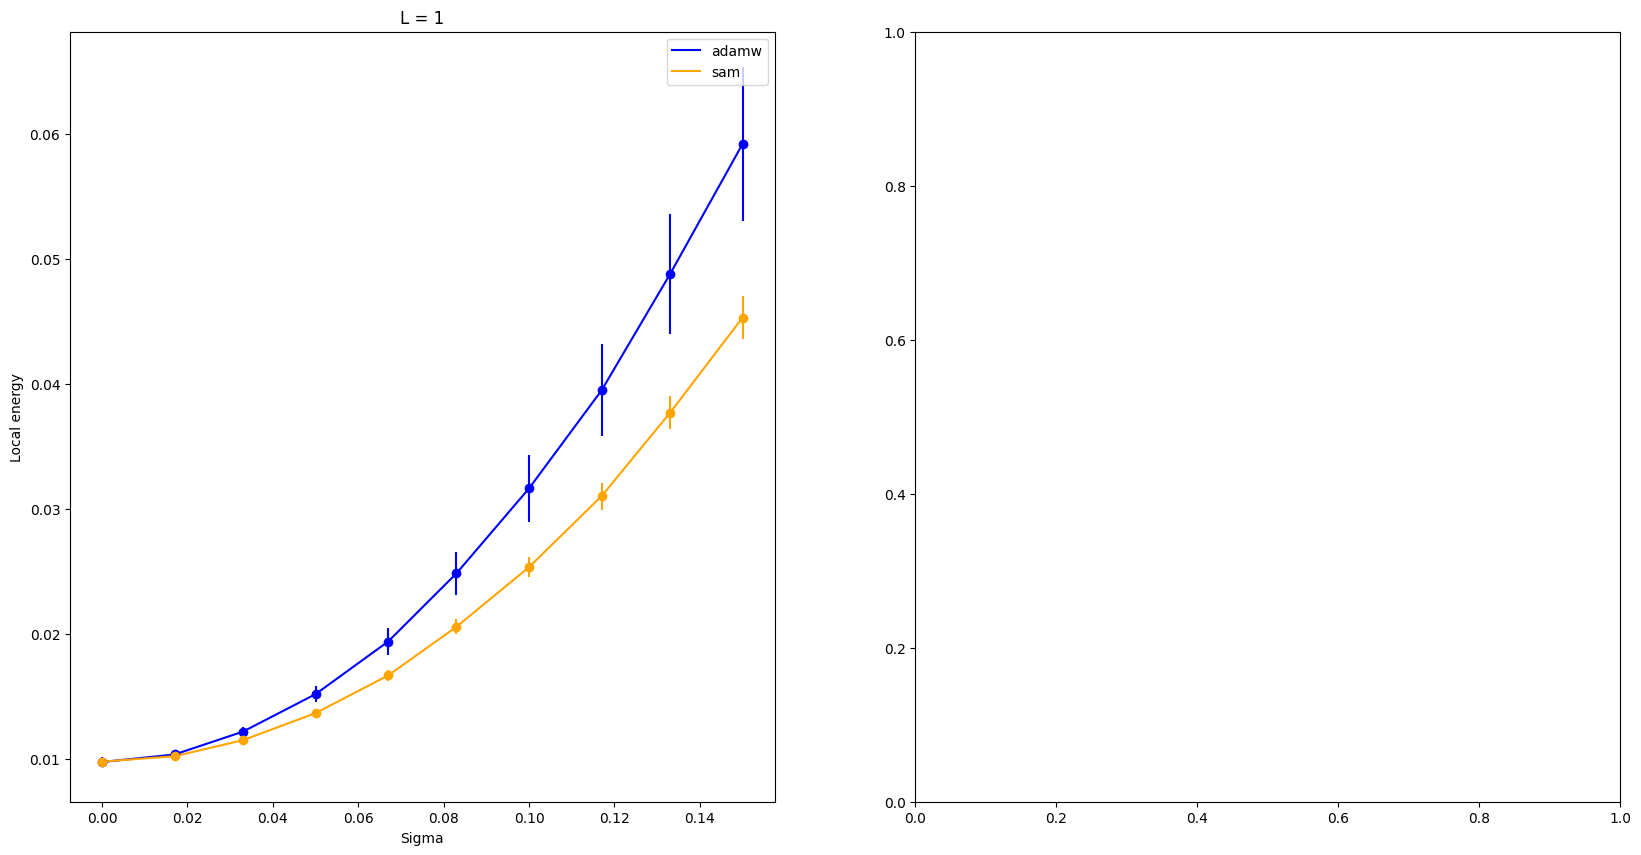

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i, hidden_layers in enumerate([1, 2]):
    for optimizer, color in zip(['adamw', 'sam'], ['blue', 'orange']):
        try:
            d = grouped.get_group((train_size, hidden_layers, optimizer))
            flatness_means = d[flat_mean_cols_train].mean().values
            flatness_vars = d[flat_mean_cols_train].var().values + (d[flat_std_cols_train]**2).mean().values
            flatness_stds = np.sqrt(flatness_vars)
            ax[i].errorbar(flatness_sigmas, flatness_means, yerr=flatness_stds, fmt='o', color=color)
            ax[i].plot(flatness_sigmas, flatness_means, label=optimizer, color=color)
            ax[i].set_xlabel("Sigma")
            ax[i].set_ylabel("Local energy")
            ax[i].set_title(f"L = {hidden_layers}")
            ax[i].legend()
        except KeyError:
            pass
plt.show()

### Plot Denoising on train set

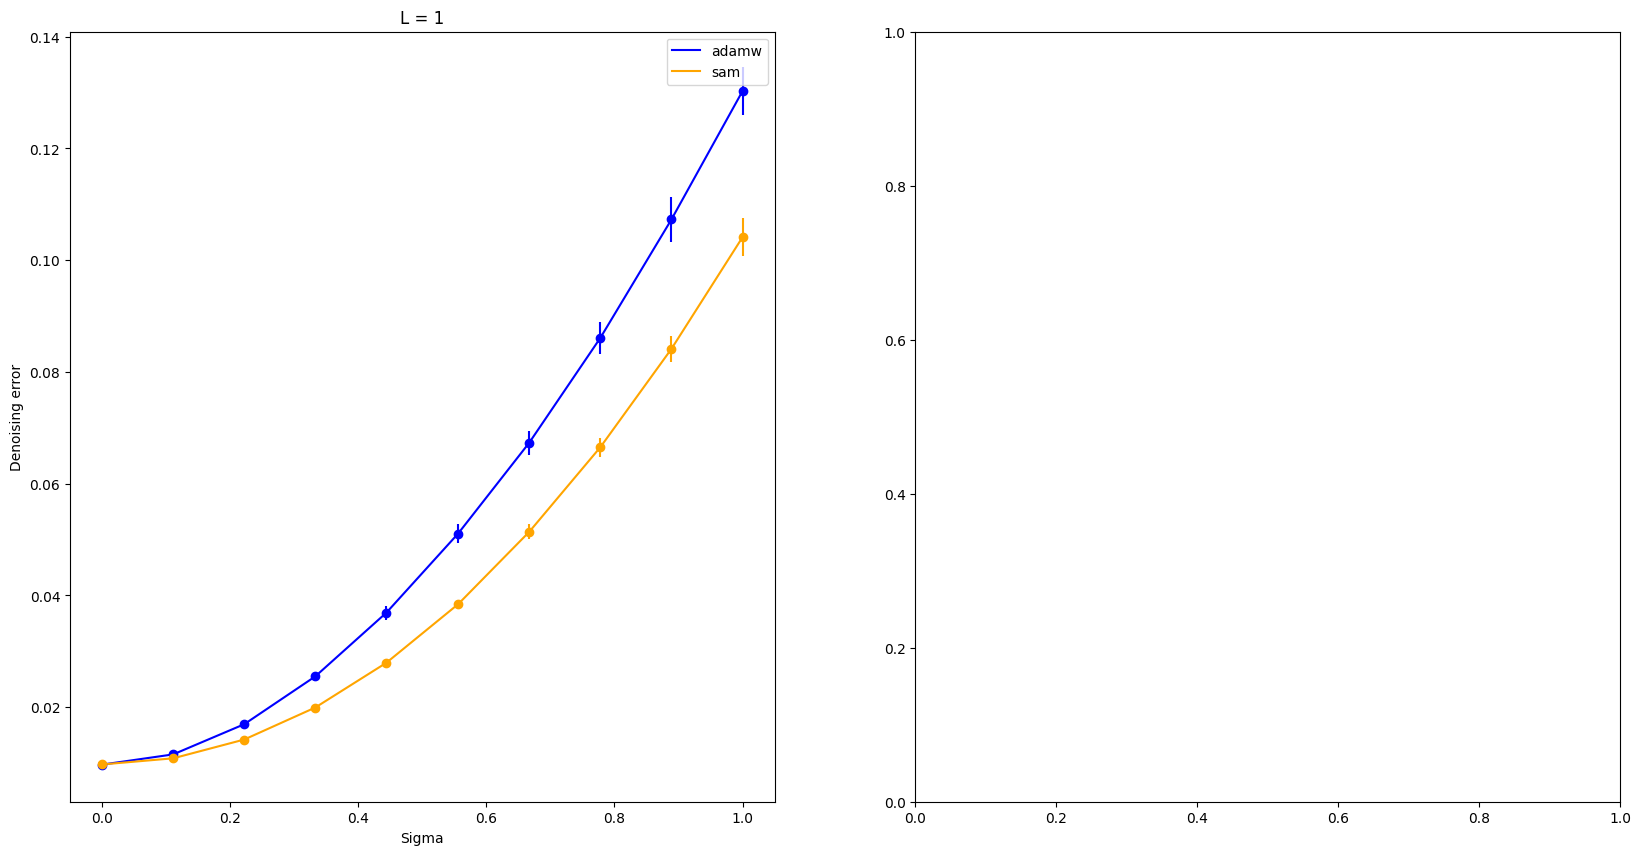

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i, hidden_layers in enumerate([1, 2]):
    for optimizer, color in zip(['adamw', 'sam'], ['blue', 'orange']):
        try:
            d = grouped.get_group((train_size, hidden_layers, optimizer))
            denoising_means = d[den_mean_cols_train].mean().values
            denoising_vars = d[den_mean_cols_train].var().values + (d[den_std_cols_train]**2).mean().values
            denoising_stds = np.sqrt(denoising_vars)
            ax[i].errorbar(denoising_sigmas, denoising_means, yerr=denoising_stds, fmt='o', color=color)
            ax[i].plot(denoising_sigmas, denoising_means, label=optimizer, color=color)
            ax[i].set_xlabel("Sigma")
            ax[i].set_ylabel("Denoising error")
            ax[i].set_title(f"L = {hidden_layers}")
            ax[i].legend()
        except KeyError:
            pass
plt.show()

## test set flatness adn denoising

In [30]:
flat_mean_cols_val = sorted([col for col in data.columns if 'flatness/val/mean' in col])
flat_std_cols_val = sorted([col for col in data.columns if 'flatness/val/std' in col])
flatness_sigmas = [col.split('_')[-1] for col in flat_mean_cols_val]
flatness_sigmas = [float(sigma) for sigma in flatness_sigmas]
flatness_sigmas = list(set(flatness_sigmas))
flatness_sigmas.sort()
flatness_sigmas

[0.0, 0.017, 0.033, 0.05, 0.067, 0.083, 0.1, 0.117, 0.133, 0.15]

In [31]:
den_mean_cols_val = sorted([col for col in data.columns if 'denoising/val/mean' in col])
den_std_cols_val = sorted([col for col in data.columns if 'denoising/val/std' in col])
denoising_sigmas = [col.split('_')[-1] for col in den_mean_cols_val]
denoising_sigmas = [float(sigma) for sigma in denoising_sigmas]
denoising_sigmas = list(set(denoising_sigmas))
denoising_sigmas.sort()
denoising_sigmas

[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]

### Plot flatness on test set

In [32]:
train_size = 512

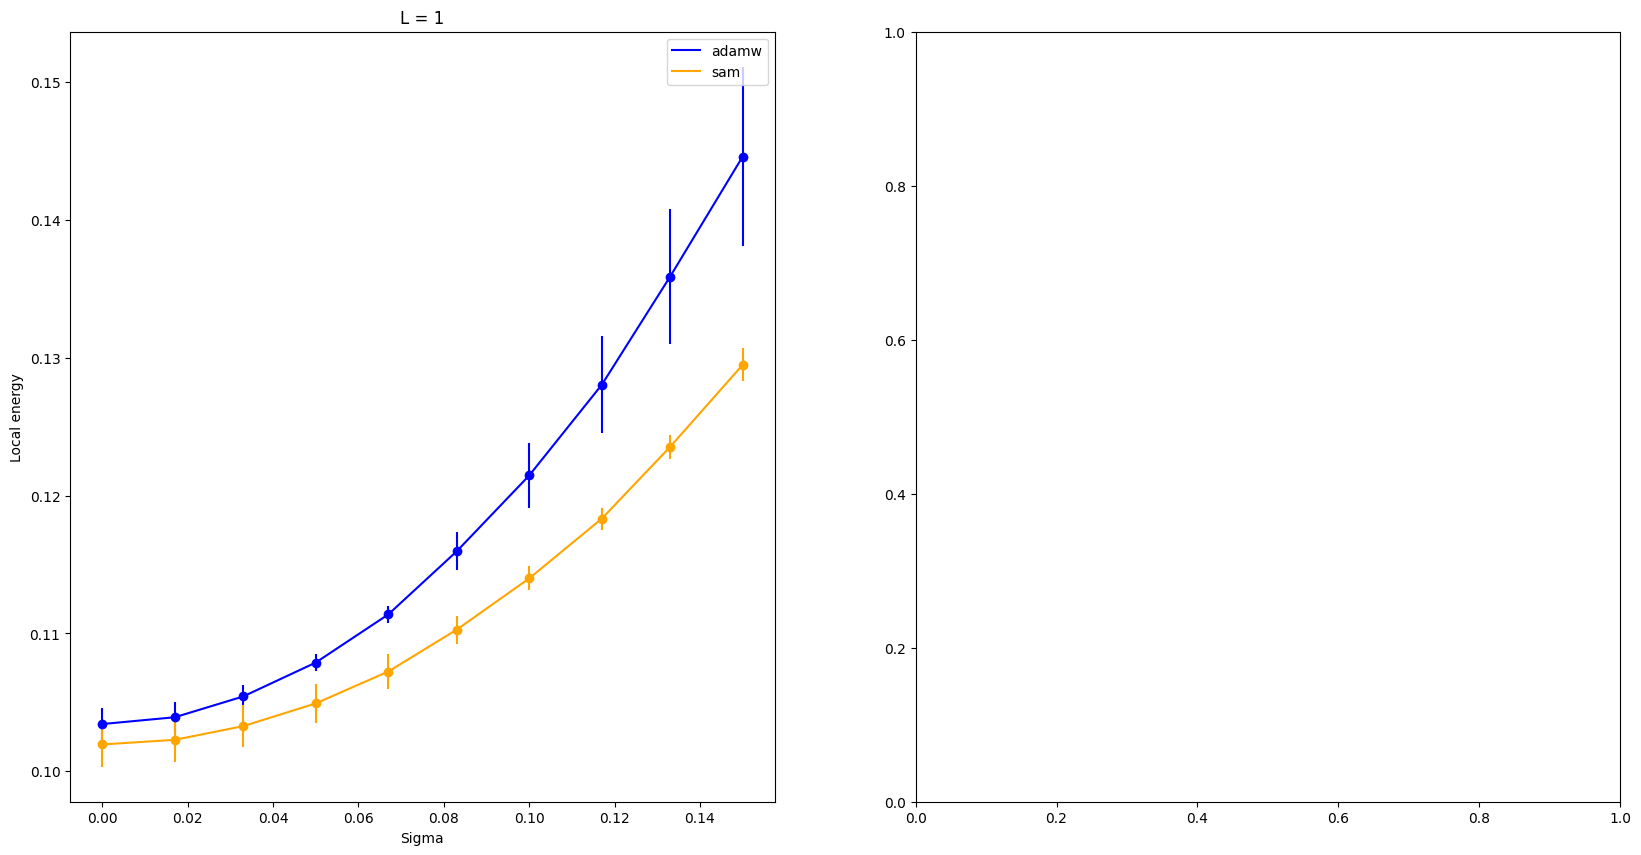

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i, hidden_layers in enumerate([1, 2]):
    for optimizer, color in zip(['adamw', 'sam'], ['blue', 'orange']):
        try:
            d = grouped.get_group((train_size, hidden_layers, optimizer))
            flatness_means = d[flat_mean_cols_val].mean().values
            flatness_vars = d[flat_mean_cols_val].var().values + (d[flat_std_cols_val]**2).mean().values
            flatness_stds = np.sqrt(flatness_vars)
            ax[i].errorbar(flatness_sigmas, flatness_means, yerr=flatness_stds, fmt='o', color=color)
            ax[i].plot(flatness_sigmas, flatness_means, label=optimizer, color=color)
            ax[i].set_xlabel("Sigma")
            ax[i].set_ylabel("Local energy")
            ax[i].set_title(f"L = {hidden_layers}")
            ax[i].legend()
        except KeyError:
            pass
plt.show()

### Plot denoising on test set

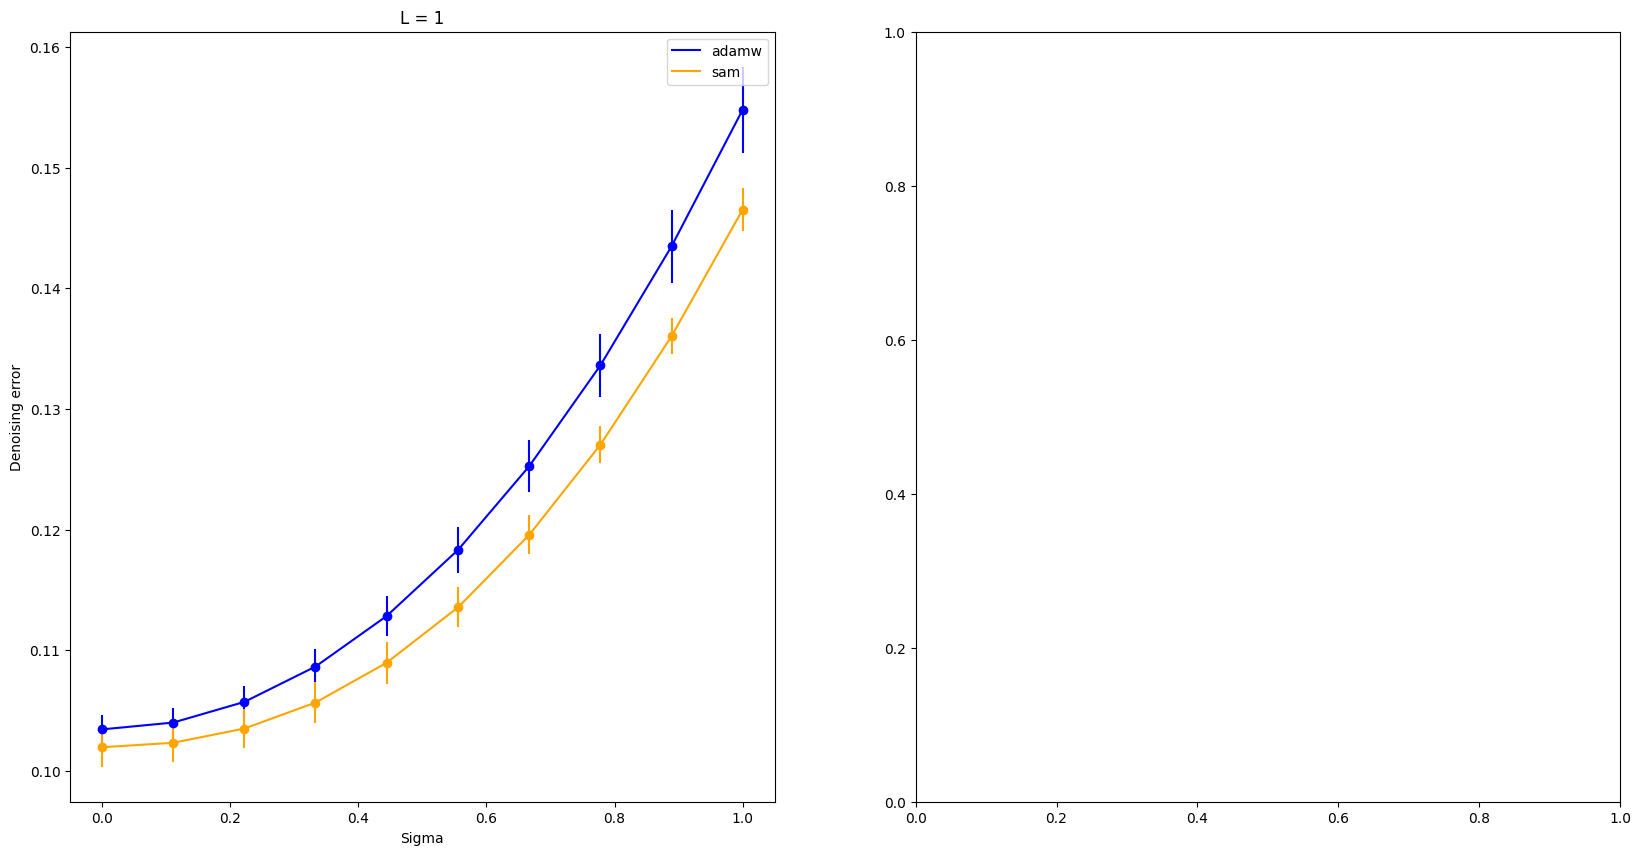

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for i, hidden_layers in enumerate([1, 2]):
    for optimizer, color in zip(['adamw', 'sam'], ['blue', 'orange']):
        try:
            d = grouped.get_group((train_size, hidden_layers, optimizer))
            denoising_means = d[den_mean_cols_val].mean().values
            denoising_vars = d[den_mean_cols_val].var().values + (d[den_std_cols_val]**2).mean().values
            denoising_stds = np.sqrt(denoising_vars)
            ax[i].errorbar(denoising_sigmas, denoising_means, yerr=denoising_stds, fmt='o', color=color)
            ax[i].plot(denoising_sigmas, denoising_means, label=optimizer, color=color)
            ax[i].set_xlabel("Sigma")
            ax[i].set_ylabel("Denoising error")
            ax[i].set_title(f"L = {hidden_layers}")
            ax[i].legend()
        except KeyError:
            pass
plt.show()